In [1]:
import os
import shutil
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
DATASET_DIR    = '../../data/FashionDataSet/'
TRAIN_DIR   = os.path.join(DATASET_DIR, 'train')
TRAIN_INFO_FILE = os.path.join(DATASET_DIR, 'train.csv' )

In [3]:
df_fashion = pd.read_csv(TRAIN_INFO_FILE)
# read labels file
with open(os.path.join(DATASET_DIR, "label_descriptions.json"), 'r') as data_file:
    f_labels = json.load(data_file) 
        
categories = f_labels.get('categories')
label_names = list()
# Iterate over list of categories and create a class out of each category
for c in categories:
    label_names.append(c.get('name').split(',')[0])

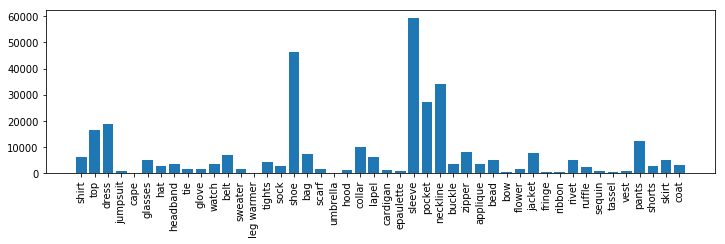

In [15]:
# Show initial distribution of classes in complete dataset
df_fashion['ClassId'] = df_fashion['ClassId'].apply(lambda x: x.split('_')[0])
cnt = df_fashion.groupby('ClassId').count()['ImageId']

plt.figure(figsize=(12, 3))
values = cnt.index.tolist()
counts = cnt.tolist()
plt.bar(values, counts )
plt.xticks(values, [label_names[int(x)] for x in values], rotation='vertical')
plt.show()

In [13]:
# Split randomly based on images id's with a 80/20 train/test size
uTotal = df_fashion.ImageId.unique()
msk = np.random.rand(len(uTotal)) < 0.8

train = uTotal[msk]
test = uTotal[~msk]

print("Total", len(uTotal))
print("Train",len(train))
print("Validation",len(test))

Total 45625
Train 36596
Validation 9029


In [14]:
SPLIT_TRAIN_DIR = os.path.join(DATASET_DIR,"split_train")
if not os.path.isdir(SPLIT_TRAIN_DIR):
    os.makedirs(SPLIT_TRAIN_DIR)

#  Move train set
for image_id in train:
    old_path = os.path.join("../train/","{}").format(image_id)
    new_path = os.path.join(SPLIT_TRAIN_DIR,"{}").format(image_id)
    if not os.path.exists(new_path):
        os.symlink(old_path, new_path)

In [15]:
SPLIT_VAL_DIR = os.path.join(DATASET_DIR,"split_val")
if not os.path.isdir(SPLIT_VAL_DIR):
    os.makedirs(SPLIT_VAL_DIR)
    
# Move val set
for image_id in test:
    old_path = os.path.join("../train/","{}").format(image_id)
    new_path = os.path.join(SPLIT_VAL_DIR,"{}").format(image_id)
    if not os.path.exists(new_path):
        os.symlink(old_path, new_path)
    #if os.path.exists(old_path):
        #os.rename(old_path, new_path)


In [16]:
# Count files
path, dirs, files = next(os.walk(TRAIN_DIR))
file_count = len(files)
print(file_count)

path, dirs, files = next(os.walk(SPLIT_TRAIN_DIR))
file_count = len(files)
print(file_count)


path, dirs, files = next(os.walk(SPLIT_VAL_DIR))
file_count = len(files)

45625
36596
9029


In [17]:
#  Save new csv files
df_train = df_fashion[df_fashion.ImageId.isin(train)]
df_test = df_fashion[df_fashion.ImageId.isin(test)]

df_train.to_csv(os.path.join(SPLIT_TRAIN_DIR,"info.csv"), index=False)
df_test.to_csv(os.path.join(SPLIT_VAL_DIR,"info.csv"), index=False)

In [5]:
# Verify new vsc files
train_segs = pd.read_csv(os.path.join(SPLIT_TRAIN_DIR,"info.csv"))
val_segs = pd.read_csv(os.path.join(SPLIT_VAL_DIR,"info.csv"))


print("train_segs", train_segs.shape)
print("train_images", len(train_segs.ImageId.unique()))
print("val_segs", val_segs.shape)
print("val_images", len(val_segs.ImageId.unique()))

train_segs (267842, 5)
train_images 36596
val_segs (65573, 5)
val_images 9029


Total train images:  36596
Total train segments:  267842


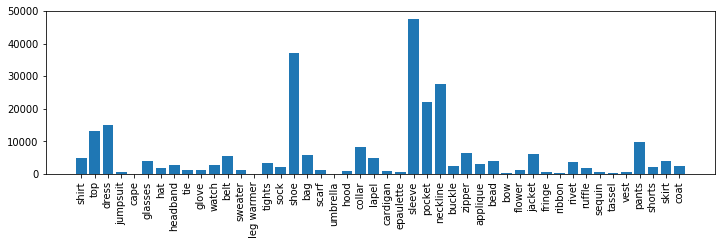

In [6]:
train_segs['ClassId'] = train_segs['ClassId'].apply(lambda x: x.split('_')[0])
print("Total train images: ", len(train_segs.ImageId.unique()))
print("Total train segments: ", len(train_segs))

tr = train_segs.groupby('ClassId').count()['ImageId']

plt.figure(figsize=(12, 3))
values = tr.index.tolist()
counts = tr.tolist()
plt.bar(values, counts)
plt.xticks(values, [label_names[int(x)] for x in values], rotation='vertical')
plt.show()

Total val images:  9029
Total val segments:  65573


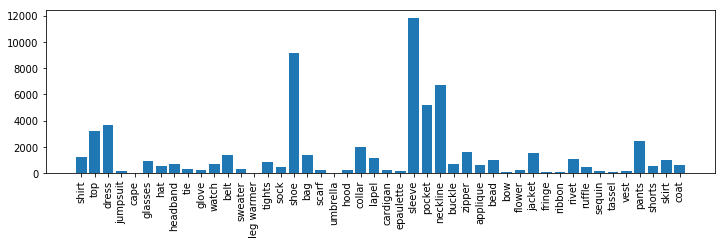

In [7]:
val_segs['ClassId'] = val_segs['ClassId'].apply(lambda x: x.split('_')[0])
print("Total val images: ", len(val_segs.ImageId.unique()))
print("Total val segments: ", len(val_segs))

val = val_segs.groupby('ClassId').count()['ImageId']

plt.figure(figsize=(12, 3))
values = val.index.tolist()
counts = val.tolist()
plt.bar(values, counts )
plt.xticks(values, [label_names[int(x)] for x in values], rotation='vertical')
plt.show()

In [18]:
train_segs.head()

,ImageId,EncodedPixels,Height,Width,ClassId
0,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6
1,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0
2,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28
3,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32
4,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,11464158 10 11469372 30 11474586 43 11479800 4...,5214,3676,32
